<a href="https://colab.research.google.com/github/AvinashKumar0210/Tasks/blob/main/Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LEVEL 2**

## **Task 1: Restaurant Ratings**
1. Analyze the distribution of aggregate ratings and determine the most common rating range.
2. Calculate the average number of votes received by restaurants.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Dataset .csv')

In [ ]:
#Analyze the distribution of agrregate ratings.
rating_counts = df['Aggregate rating'].value_counts().sort_index()
print(rating_counts)

Aggregate rating
0.0    2148
1.8       1
1.9       2
2.0       7
2.1      15
2.2      27
2.3      47
2.4      87
2.5     110
2.6     191
2.7     250
2.8     315
2.9     381
3.0     468
3.1     519
3.2     522
3.3     483
3.4     498
3.5     480
3.6     458
3.7     427
3.8     400
3.9     335
4.0     266
4.1     274
4.2     221
4.3     174
4.4     144
4.5      95
4.6      78
4.7      42
4.8      25
4.9      61
Name: count, dtype: int64


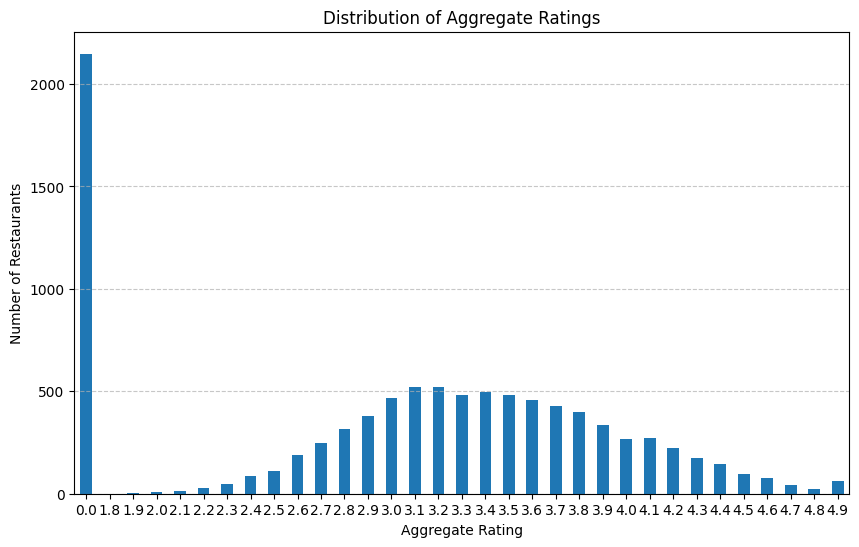

In [ ]:
#Plotting the distribution
plt.figure(figsize=(10,6))
rating_counts.plot(kind='bar')
plt.xlabel('Aggregate Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
#Determine the most common rating range
most_common_rating = rating_counts.idxmax()
print(f"The most common rating range is: {most_common_rating}")

The most common rating range is: 0.0


In [ ]:
#Converting votes column to numeric
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

#Calculating the average number of votes
average_votes = df['Votes'].mean()
print(f"The average number of votes received by restaurants is: {average_votes:.2f}")

The average number of votes received by restaurants is: 156.91


## **Task 2 : Cuisine Combination**
1. Identify the most common combinations of cuisines in the data set.
2. Determine if certain cuisines combination tends to have higher ratings.

In [ ]:
from itertools import combinations
from collections import Counter
#splitting the cuisines and finding all combinations.
cuisine_combinations = df['Cuisines'].dropna().apply(lambda x: tuple(sorted(x.split(',  '))))
combination_counts = Counter(cuisine_combinations)
print(combination_counts)

Counter({('North Indian',): 936, ('North Indian, Chinese',): 511, ('Chinese',): 354, ('Fast Food',): 354, ('North Indian, Mughlai',): 334, ('Cafe',): 299, ('Bakery',): 218, ('North Indian, Mughlai, Chinese',): 197, ('Bakery, Desserts',): 170, ('Street Food',): 149, ('Pizza, Fast Food',): 131, ('Chinese, Fast Food',): 118, ('Mithai, Street Food',): 116, ('South Indian',): 112, ('Bakery, Fast Food',): 108, ('Chinese, North Indian',): 105, ('Mughlai',): 103, ('Ice Cream, Desserts',): 83, ('North Indian, Fast Food',): 74, ('Ice Cream',): 74, ('Mithai',): 71, ('North Indian, Chinese, Mughlai',): 70, ('North Indian, Chinese, Fast Food',): 68, ('North Indian, Chinese, Continental',): 65, ('Bakery, Desserts, Fast Food',): 63, ('American, Fast Food, Salad, Healthy Food',): 62, ('Mughlai, North Indian',): 60, ('Fast Food, Burger',): 56, ('Italian',): 54, ('Beverages',): 54, ('Biryani',): 54, ('Pizza',): 53, ('Desserts',): 53, ('Chinese, Thai',): 51, ('Finger Food',): 49, ('Raw Meats, North India

In [ ]:
#converting  to dataframe for easier handling
combination_df = pd.DataFrame(combination_counts.items(), columns=['Cuisines Combination', 'Count'])
combination_df = combination_df.sort_values(by='Count', ascending=False).reset_index(drop=True)
print(combination_df)

                                   Cuisines Combination  Count
0                                       (North Indian,)    936
1                              (North Indian, Chinese,)    511
2                                            (Chinese,)    354
3                                          (Fast Food,)    354
4                              (North Indian, Mughlai,)    334
...                                                 ...    ...
1820                              (Bengali, Fast Food,)      1
1821                 (North Indian, Rajasthani, Asian,)      1
1822            (Chinese, Thai, Malaysian, Indonesian,)      1
1823  (Bakery, Desserts, North Indian, Bengali, Sout...      1
1824                          (Italian, World Cuisine,)      1

[1825 rows x 2 columns]


In [ ]:
#displaying the top 10 most common combinations
top_combinations = combination_df.head(10)
print(f" The top 10 most common combinations of Cuisines : ", top_combinations)

 The top 10 most common combinations of Cuisines :                  Cuisines Combination  Count
0                    (North Indian,)    936
1           (North Indian, Chinese,)    511
2                         (Chinese,)    354
3                       (Fast Food,)    354
4           (North Indian, Mughlai,)    334
5                            (Cafe,)    299
6                          (Bakery,)    218
7  (North Indian, Mughlai, Chinese,)    197
8                (Bakery, Desserts,)    170
9                     (Street Food,)    149


In [ ]:
#Calculating the average rating for each cuisine combination
cuisine_rating_df = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()
cuisine_rating_df = cuisine_rating_df.sort_values(by='Aggregate rating', ascending=False).reset_index(drop=True)
print(cuisine_rating_df)

                            Cuisines  Aggregate rating
0                      Italian, Deli               4.9
1                  Hawaiian, Seafood               4.9
2            American, Sandwich, Tea               4.9
3                Continental, Indian               4.9
4            European, Asian, Indian               4.9
...                              ...               ...
1820  Fast Food, Desserts, Beverages               0.0
1821      Fast Food, Chinese, Burger               0.0
1822                    Cafe, French               0.0
1823  Seafood, Mughlai, North Indian               0.0
1824    Fast Food, Mughlai, Armenian               0.0

[1825 rows x 2 columns]


In [ ]:
#Merge the counts and ratings
combination_rating_df = pd.merge(top_combinations, cuisine_rating_df, left_on='Cuisines Combination', right_on='Cuisines')
combination_rating_df = combination_rating_df.drop(columns=['Cuisines'])

#Sorting by average rating and display the top 10
combination_rating_df = combination_rating_df.sort_values(by='Aggregate rating', ascending=False).head(10)
print(f"Top 10 Cuisines Combinations by Average Ratings : ",combination_rating_df)

Top 10 Cuisines Combinations by Average Ratings :  Empty DataFrame
Columns: [Cuisines Combination, Count, Aggregate rating]
Index: []


## **Task 3 : Geographical Analysis**
1. Plot the location of restaurants on a map using longitude and latitude coordinates.
2. Identify any patterns or any clusters of restaurants in specific areas.

In [ ]:
import folium
from folium.plugins import MarkerCluster


In [ ]:
#Calculating the center of the map
center_latitude = df['Latitude'].mean()
center_longitude = df['Longitude'].mean()

#Creating a map centered around the calculated coordinates
map_center = [center_latitude, center_longitude]
map_zoom = 12
map = folium.Map(location=map_center, zoom_start=map_zoom)

In [ ]:
# Add marker clusters
marker_cluster = MarkerCluster().add_to(map)

In [ ]:
# Plot each restaurants  on the map
for index, row in df.iterrows():
  folium.Marker(
      location=[row['Latitude'], row['Longitude']],
      popup=row['Restaurant Name'],
      icon=folium.Icon(color='blue', icon='info-sign')
  ).add_to(marker_cluster)
  print(f"Restaurant Name: {row['Restaurant Name']}, Latitude: {row['Latitude']}, Longitude: {row['Longitude']}")

Streaming output truncated to the last 5000 lines.
Restaurant Name: The Wrap Factory, Latitude: 28.6594593, Longitude: 77.3062599
Restaurant Name: Urban Punjab, Latitude: 28.6480355, Longitude: 77.3029072
Restaurant Name: Classic, Latitude: 28.6484283, Longitude: 77.3023672
Restaurant Name: Goosebumps, Latitude: 28.6467421, Longitude: 77.3020809
Restaurant Name: Adyar Ananda Bhavan, Latitude: 28.646476, Longitude: 77.1952884
Restaurant Name: Amma Mess, Latitude: 28.6470539, Longitude: 77.1919642
Restaurant Name: Amritsari Chaap Corner, Latitude: 28.65456149, Longitude: 77.18920413
Restaurant Name: Aroma Spice, Latitude: 28.64779259, Longitude: 77.18937848
Restaurant Name: Boheme Cafe Bar, Latitude: 28.6458903, Longitude: 77.1872922
Restaurant Name: Cafe Coffee Day, Latitude: 28.64590801, Longitude: 77.1968947
Restaurant Name: Chinese King, Latitude: 28.6457369, Longitude: 77.1875617
Restaurant Name: Chopsuey, Latitude: 28.6576903, Longitude: 77.1889094
Restaurant Name: Chowringhee, Lat

## **Task 4 : Restaurant Chains**
1. Identify of there are any restaurant chains present in dataset.
2. Analyze the ratings and popularity of different restaurant chains.

In [ ]:
# identifying the restaurant chains

restaurant_chains = df.groupby('Restaurant Name').size().reset_index(name='Chain Count')
restaurant_chains = restaurant_chains[restaurant_chains['Chain Count'] > 1]
print(restaurant_chains)

           Restaurant Name  Chain Count
7        10 Downing Street            2
27      221 B Baker Street            3
44      34 Parkstreet Lane            2
45    34, Chowringhee Lane           12
59          4700BC Popcorn            2
...                    ...          ...
7383                 Zaika            4
7389     Zaika Kathi Rolls            2
7417                  Zizo            3
7424       Zooby's Kitchen            2
7432                bu��no            2

[734 rows x 2 columns]


In [ ]:
#Analysing ratings and popularity of restaurant chains
chain_data = df[df['Restaurant Name'].isin(restaurant_chains['Restaurant Name'])]


In [ ]:
#Grouping  the restaurant name to calculate average rating and total votes
chain_ratings = chain_data.groupby('Restaurant Name').agg({'Aggregate rating': 'mean', 'Votes': 'sum'}).reset_index()
chain_ratings = chain_ratings.sort_values(by='Aggregate rating', ascending=False)


In [ ]:
#Displaying result
restaurant_chains[:10], chain_ratings[:10]

(               Restaurant Name  Chain Count
 7            10 Downing Street            2
 27          221 B Baker Street            3
 44          34 Parkstreet Lane            2
 45        34, Chowringhee Lane           12
 59              4700BC Popcorn            2
 69                6 Pack Momos            2
 93            A Piece of Paris            2
 101  AB's - Absolute Barbecues            4
 102    AB's Absolute Barbecues            2
 123              Aap Ki Khatir            2,
                Restaurant Name  Aggregate rating  Votes
 629           Talaga Sampireun             4.900   5514
 589           Silantro Fil-Mex             4.850   1364
 8      AB's Absolute Barbecues             4.850   3151
 7    AB's - Absolute Barbecues             4.825  13400
 449         Naturals Ice Cream             4.800   3094
 293                   Gymkhana             4.700    328
 653     The Cheesecake Factory             4.650   3010
 218                    Dishoom             4.60